In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving churn_dataset.csv to churn_dataset.csv


In [ ]:
telecom = pd.read_csv('churn_dataset.csv')
telecom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telecom.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], downcast='float', errors = 'coerce')

In [ ]:
telecom.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
telecom.dropna(axis=0, how='any', inplace=True)

In [ ]:
telecom.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
telecom.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300537
std,0.368612,24.559481,30.090047,2266.771484
min,0.000000,0.000000,18.250000,18.799999
25%,0.000000,9.000000,35.500000,401.450012
50%,0.000000,29.000000,70.350000,1397.475098
75%,0.000000,55.000000,89.850000,3794.737549
max,1.000000,72.000000,118.750000,8684.799805


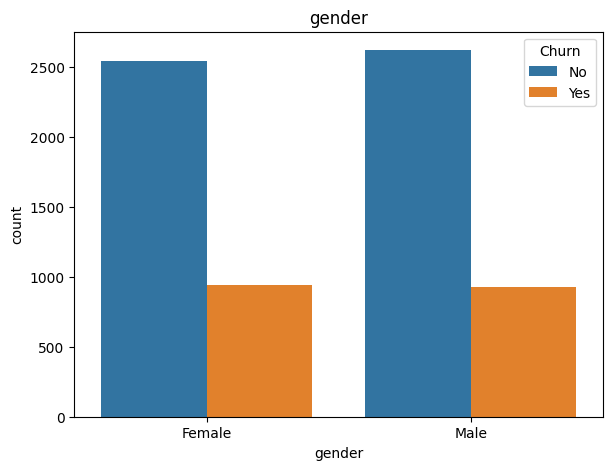

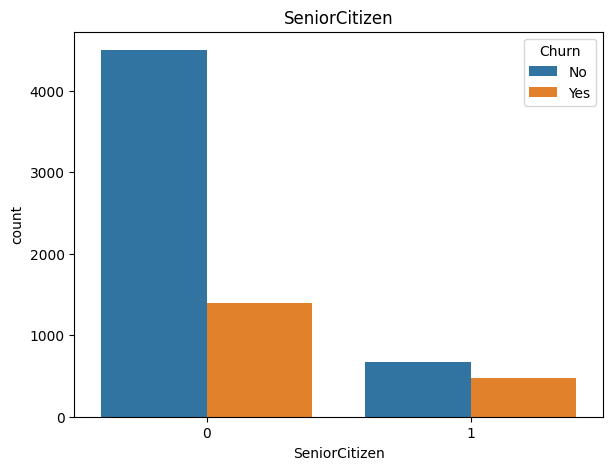

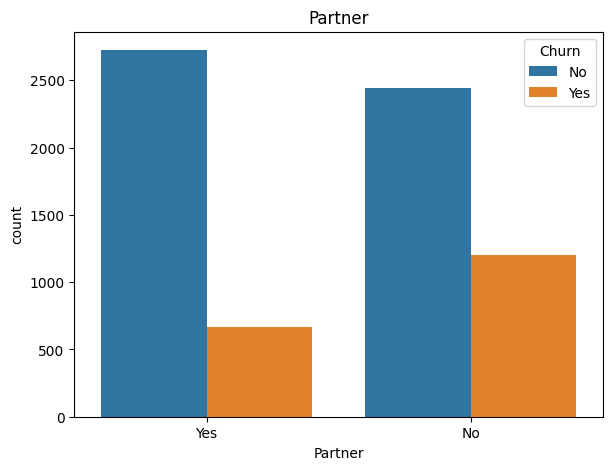

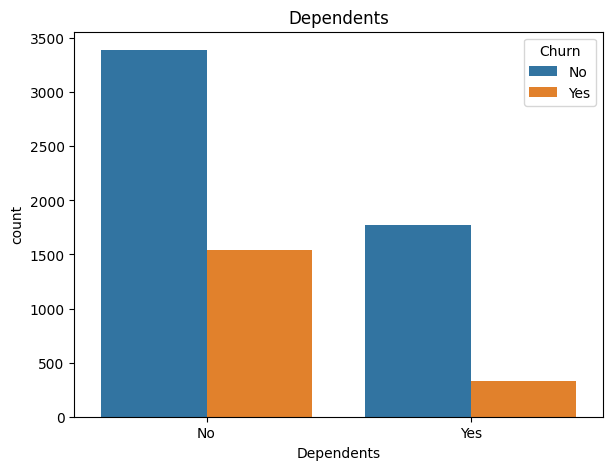

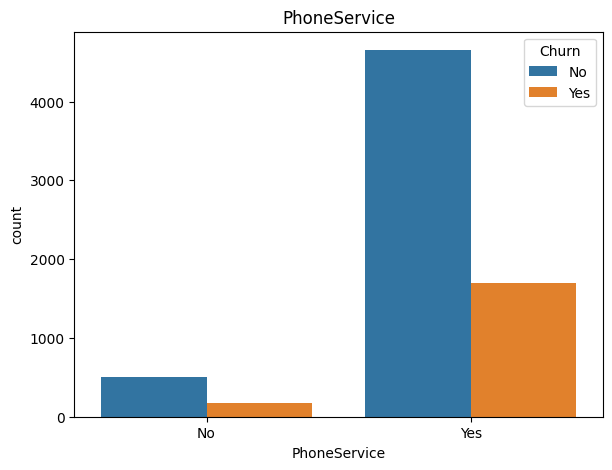

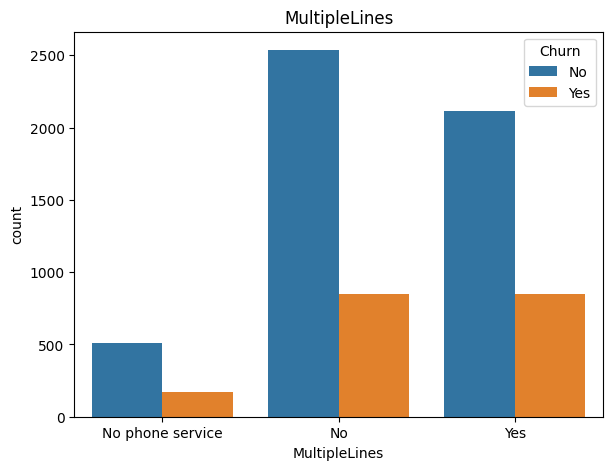

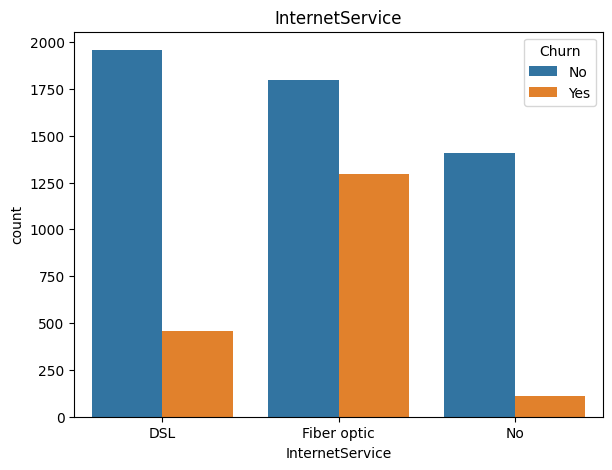

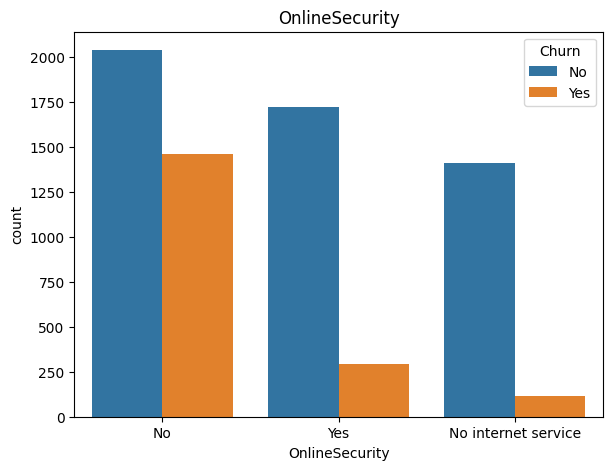

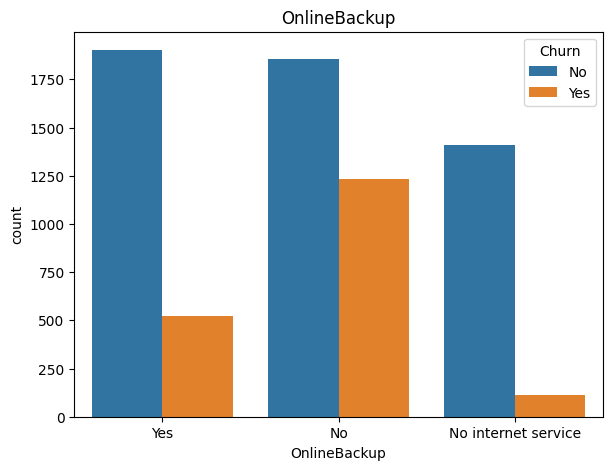

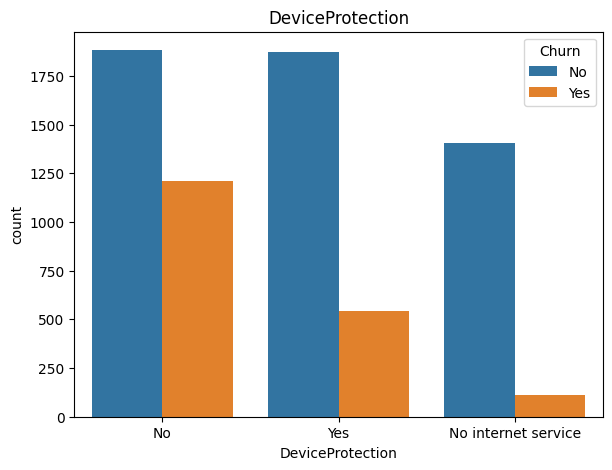

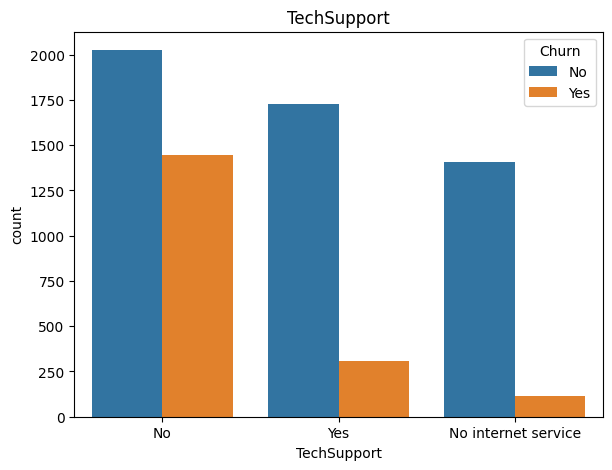

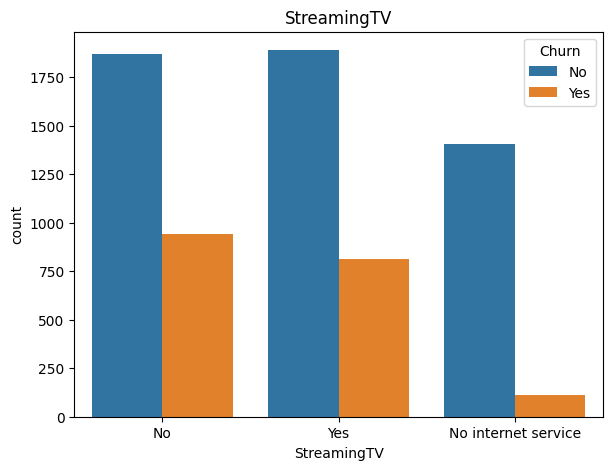

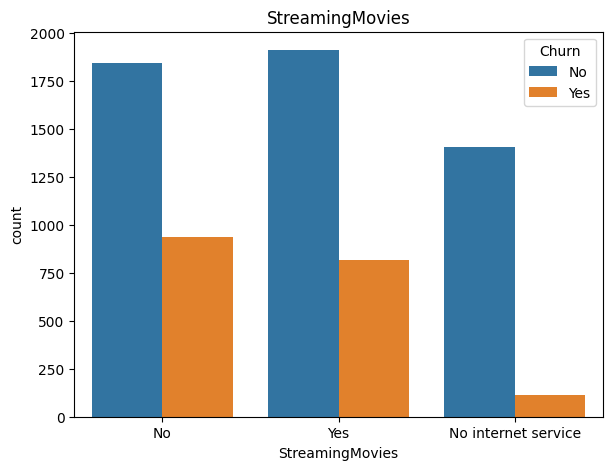

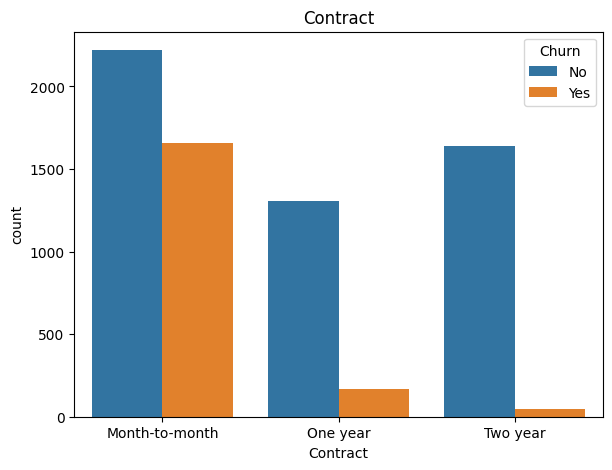

In [ ]:
col = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
for i in range(0,14):
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    plt.title(col[i])
    sns.countplot(x =col[i], hue = "Churn", data = telecom)

<Axes: xlabel='Churn', ylabel='count'>

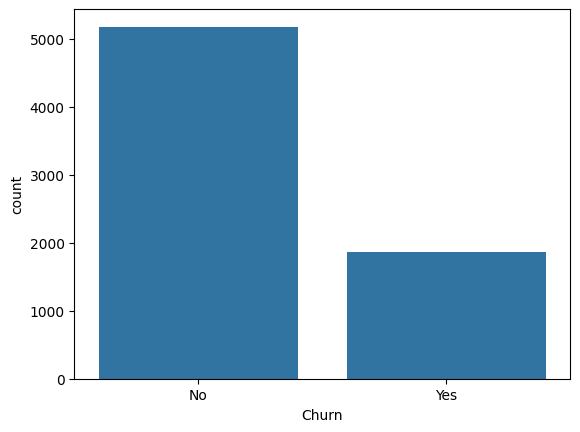

In [ ]:
sns.countplot(x='Churn',data=telecom)

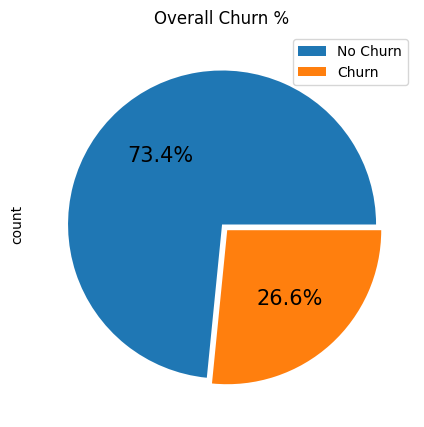

In [ ]:
plt.figure(figsize=(7,5))

telecom['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.title('Overall Churn %')
plt.show()

<ipython-input-379-72484756042b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=telecom, x='tenure', hue='Churn',shade = True)


<Axes: xlabel='tenure', ylabel='Density'>

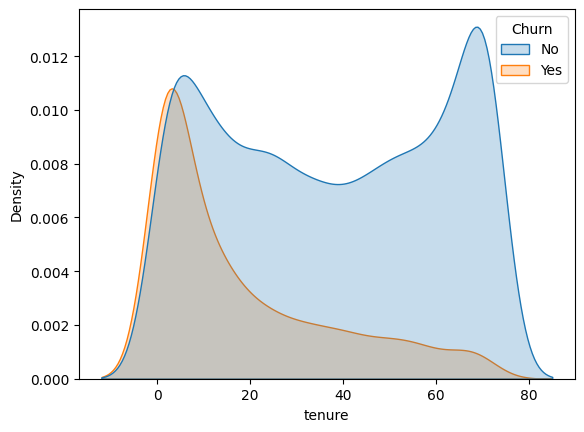

In [ ]:
sns.kdeplot(data=telecom, x='tenure', hue='Churn',shade = True)

<ipython-input-380-7585df778464>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=telecom, x='MonthlyCharges', hue='Churn',shade = True)


<Axes: xlabel='MonthlyCharges', ylabel='Density'>

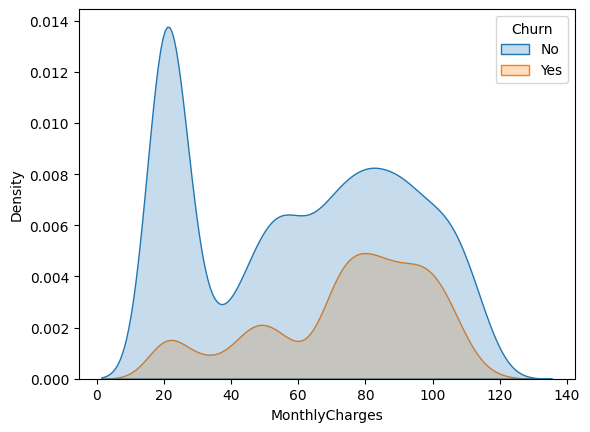

In [ ]:
sns.kdeplot(data=telecom, x='MonthlyCharges', hue='Churn',shade = True)

<ipython-input-381-3187ad919313>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=telecom, x='TotalCharges', hue='Churn',shade = True)


<Axes: xlabel='TotalCharges', ylabel='Density'>

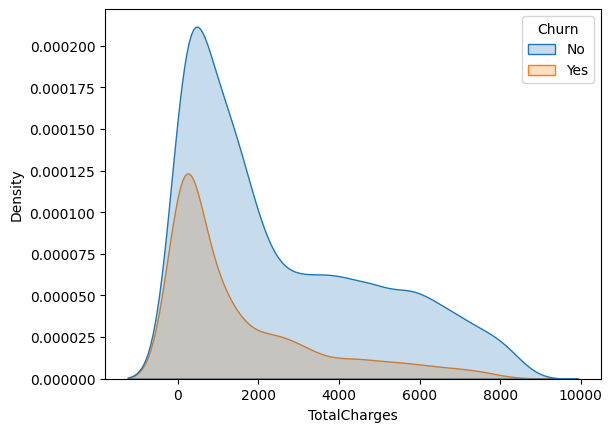

In [ ]:
sns.kdeplot(data=telecom, x='TotalCharges', hue='Churn',shade = True)

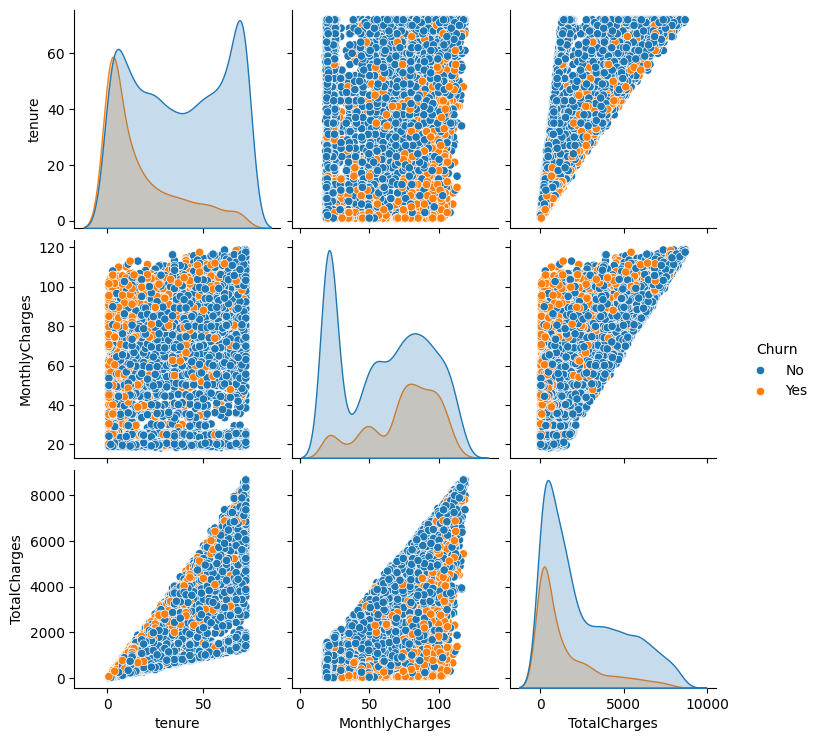

In [ ]:
sns.pairplot(telecom,vars = ['tenure', 'MonthlyCharges', 'TotalCharges'],hue='Churn')

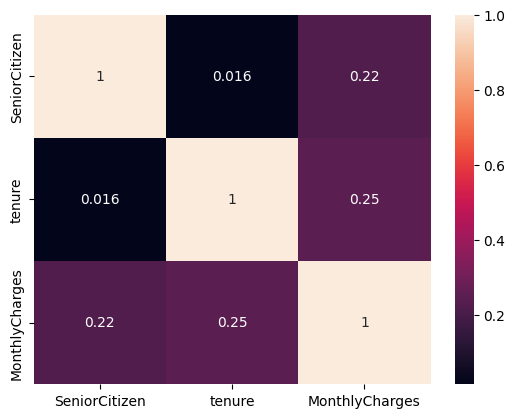

In [ ]:
sns.heatmap(telecom.select_dtypes(include=['int64','float64']).corr(),annot=True)
plt.show()

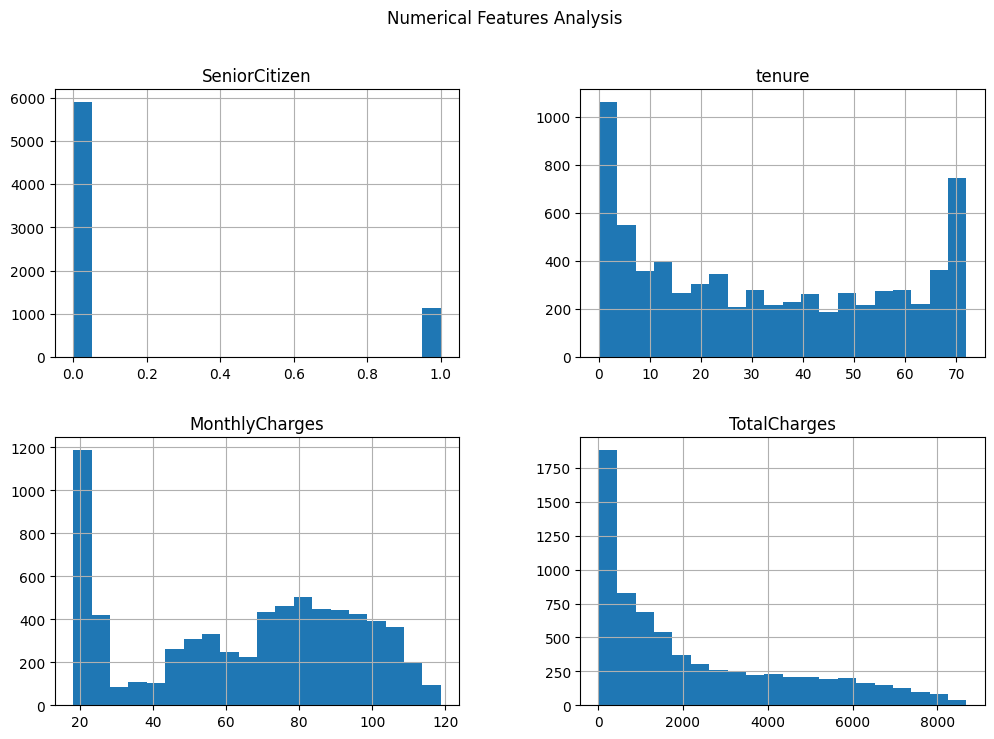

In [ ]:
telecom.hist(bins=20, figsize=(12, 8))
plt.suptitle('Numerical Features Analysis')
plt.show()

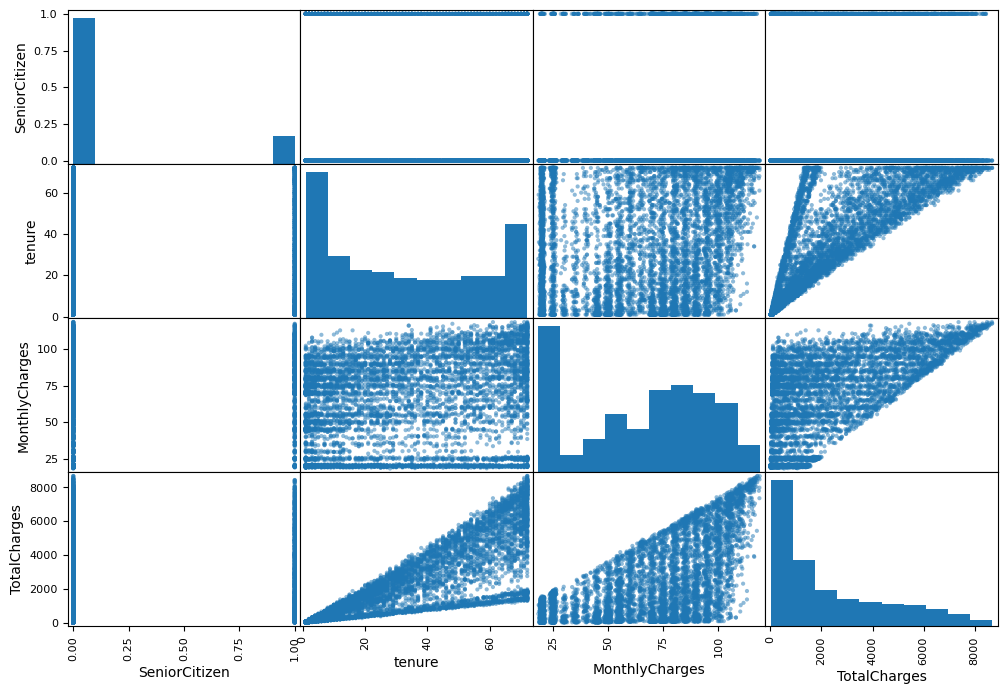

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["SeniorCitizen", "tenure", "MonthlyCharges","TotalCharges"]
scatter_matrix(telecom[attributes], figsize=(12, 8))
plt.show()

### Predicting Missing Values

In [ ]:
telecom = pd.read_csv('churn_dataset.csv')
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], downcast='float', errors = 'coerce')
y_missing = telecom[telecom['TotalCharges'].isna()]

telecom_1 = telecom.dropna(axis=0, how='any')
X1 = telecom_1.drop(['TotalCharges','customerID'],axis=1)
y1 = telecom_1['TotalCharges']

from sklearn.model_selection import train_test_split
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.25,random_state=23)
X1_train_cat = X1_train.select_dtypes(include=['object'])
X1_train_num = X1_train.select_dtypes(include=['int64','float64'])

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,StandardScaler

X1_train_cat_transformed = X1_train_cat.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X1_train_num_transformed = pd.DataFrame(scaler.fit_transform(X1_train_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X1_train_num.index)

X1_train_transformed = pd.concat([X1_train_num_transformed, X1_train_cat_transformed], axis=1)
X1_train_transformed.head()

X1_test_cat = X1_test.select_dtypes(include=['object'])
X1_test_num = X1_test.select_dtypes(include=['int64','float64'])

X1_test_cat_transformed = X1_test_cat.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X1_test_num_transformed = pd.DataFrame(scaler.fit_transform(X1_test_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X1_test_num.index)

X1_test_transformed = pd.concat([X1_test_num_transformed, X1_test_cat_transformed], axis=1)

# Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

regressor = LinearRegression()
regressor.fit(X1_train_transformed,y1_train)

y1_test_pred = regressor.predict(X1_test_transformed)

MAE = mean_absolute_error(y1_test,y1_test_pred)
MSE = mean_squared_error(y1_test, y1_test_pred)
R2 = r2_score(y1_test, y1_test_pred)

y_missing1 = y_missing.drop(['TotalCharges','customerID'],axis=1)
y_missing1_cat = y_missing1.select_dtypes(include=['object'])
y_missing1_num = y_missing1.select_dtypes(include=['int64','float64'])

y_missing1_cat_transformed = y_missing1_cat.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
y_missing1_num_transformed = pd.DataFrame(scaler.fit_transform(y_missing1_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = y_missing1_num.index)

y_missing1_transformed = pd.concat([y_missing1_num_transformed, y_missing1_cat_transformed], axis=1)

y_test_pred_missing = regressor.predict(y_missing1_transformed)

y_missing['TotalCharges'] = y_test_pred_missing

New_telecom = pd.concat([telecom_1, y_missing], axis=0)

<ipython-input-418-02405d18262f>:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_missing['TotalCharges'] = y_test_pred_missing


In [ ]:
y_missing.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,3019.383166,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,1372.563319,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,4521.392190,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,1697.744995,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,3503.999270,No


In [ ]:
y_missing.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


### Model Training with predicted missing values

In [ ]:
X = New_telecom.drop(['Churn','customerID'],axis=1)
y = New_telecom['Churn']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

### Training Data preprocessoing

In [ ]:
X_train_cat = X_train[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]
X_train_num = X_train[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

X_train_cat_transformed = X_train_cat.apply(LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
1941,-0.441920,-1.197157,-0.337272,-0.923507,1,0,0,1,0,0,0,0,0,0,0,2,0,0,3
7010,2.262854,-1.278578,0.320963,-0.973845,0,1,0,1,2,1,0,0,0,0,0,0,0,1,2
5872,-0.441920,-1.278578,0.161391,-0.975953,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2
131,-0.441920,-0.301528,-0.205957,-0.346775,0,1,1,0,1,0,2,2,2,0,2,2,0,1,1
3020,-0.441920,0.024155,-1.022102,-0.517439,1,0,1,0,1,0,2,0,0,2,0,0,1,0,1


### Testing Data Proprocessing

In [ ]:
X_test_cat = X_test[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]
X_test_num = X_test[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

X_test_cat_transformed = X_test_cat.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_test_num.index)

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
4124,2.304740,-0.540544,1.005944,-0.223044,0,1,0,1,2,1,0,0,0,0,2,2,0,1,2
1306,-0.433888,1.537748,1.690100,2.634837,0,0,0,1,2,1,2,2,2,2,2,2,1,0,1
6210,-0.433888,-0.296039,-0.329156,-0.444723,0,0,1,1,0,0,0,2,0,2,0,0,1,1,1
3790,-0.433888,-1.233309,-1.506502,-1.000401,1,0,0,1,0,2,1,1,1,1,1,1,1,0,1
2744,-0.433888,0.396725,1.140450,0.842824,0,1,0,1,0,1,0,0,2,2,2,2,2,1,1


### Model Training

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A1_pred = accuracy_score(y_test, y_test_pred)


# Logistic Regression

from sklearn import linear_model

logr = linear_model.LogisticRegression()

logr.fit(X_train_transformed, y_train)

y_test_pred = logr.predict(X_test_transformed)

A2_pred = accuracy_score(y_test, y_test_pred)


# Support Vector Machine

from sklearn.svm import SVC
svc = SVC().fit(X_train_transformed, y_train)

y_test_pred = svc.predict(X_test_transformed)

A3_pred = accuracy_score(y_test, y_test_pred)


# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train_transformed,y_train)

y_test_pred = classifier.predict(X_test_transformed)

A4_pred = accuracy_score(y_test, y_test_pred)


# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A5_pred = accuracy_score(y_test, y_test_pred)



In [ ]:
Performance_data = [['KNN', A1_pred], ['Logistic Regression', A2_pred], ['Support_Vector_Machine', A3_pred],['Decision_Tree', A4_pred],['Random_Forest', A5_pred]]

df_Performance = pd.DataFrame(Performance_data, columns=['Algorithm', 'Accuracy with prediction'])

df_Performance

,Algorithm,Accuracy with prediction
0,KNN,0.751846
1,Logistic Regression,0.798978
2,Support_Vector_Machine,0.785917
3,Decision_Tree,0.773992
4,Random_Forest,0.784781


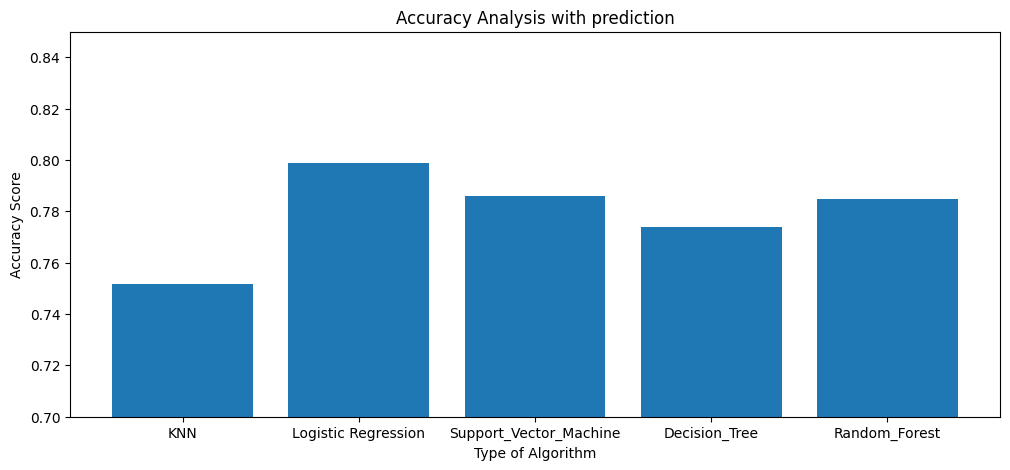

In [ ]:
x1 = df_Performance['Algorithm']
y1 = df_Performance[df_Performance.columns[1]]
plt.figure(figsize=(12,5))
plt.title("Accuracy Analysis with prediction")
plt.bar(x1,y1)
plt.xlabel('Type of Algorithm')
plt.ylabel('Accuracy Score')
plt.ylim(0.7, 0.85)
plt.show()

### Spliting Data

In [ ]:
X = telecom.drop(['Churn','customerID'],axis=1)
y = telecom['Churn']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=23)

### Training Data preprocessoing

In [ ]:
X_train_cat = X_train[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]
X_train_num = X_train[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder

X_train_cat_transformed = X_train_cat.apply(LabelEncoder().fit_transform)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_num_transformed = pd.DataFrame(scaler.fit_transform(X_train_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_train_num.index)

X_train_transformed = pd.concat([X_train_num_transformed, X_train_cat_transformed], axis=1)

X_train_transformed.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3867,-0.440174,-0.249556,0.291876,-0.158688,0,1,0,1,0,0,0,2,2,0,2,2,2,1,1
3928,-0.440174,-0.575722,1.036240,-0.229185,0,1,0,1,0,1,0,0,2,0,2,2,0,1,1
1351,-0.440174,-0.861116,-1.467078,-0.886936,1,1,1,1,0,2,1,1,1,1,1,1,0,1,2
3563,2.271831,-0.086473,0.855536,0.145016,1,0,0,1,2,1,2,0,0,0,0,2,0,1,1
2145,-0.440174,-0.861116,0.271982,-0.637139,1,0,0,1,0,1,0,0,2,0,0,0,0,0,2


### Testing Data Proprocessing

In [ ]:
X_test_cat = X_test[['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod']]
X_test_num = X_test[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']]

X_test_cat_transformed = X_test_cat.apply(LabelEncoder().fit_transform)

scaler = StandardScaler()
X_test_num_transformed = pd.DataFrame(scaler.fit_transform(X_test_num),
                                    columns = scaler.get_feature_names_out(),
                                    index = X_test_num.index)

X_test_transformed = pd.concat([X_test_num_transformed, X_test_cat_transformed], axis=1)

X_test_transformed.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
2866,-0.440787,-0.867911,0.653161,-0.585752,0,0,0,1,0,1,0,2,0,0,0,2,0,1,2
4986,-0.440787,-0.867911,0.483994,-0.612039,0,0,0,1,2,1,0,0,0,2,0,0,0,1,1
4850,-0.440787,0.841518,1.170711,1.318964,0,0,0,1,0,1,2,2,0,0,2,2,1,1,1
5080,-0.440787,1.370626,0.939572,1.794243,1,1,0,1,2,1,0,2,2,0,0,2,2,1,2
6672,-0.440787,-0.257400,-1.499109,-0.801808,1,0,0,1,0,2,1,1,1,1,1,1,2,0,1


### Model Training

In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A1 = accuracy_score(y_test, y_test_pred)

# Logistic Regression

from sklearn import linear_model

logr = linear_model.LogisticRegression()

logr.fit(X_train_transformed, y_train)

y_test_pred = logr.predict(X_test_transformed)

A2 = accuracy_score(y_test, y_test_pred)

# Support Vector Machine

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train_transformed, y_train)

y_test_pred = svc.predict(X_test_transformed)

A3 = accuracy_score(y_test, y_test_pred)

# Decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=3)
classifier.fit(X_train_transformed,y_train)

y_test_pred = classifier.predict(X_test_transformed)

A4 = accuracy_score(y_test, y_test_pred)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A5 = accuracy_score(y_test, y_test_pred)

In [ ]:
Performance_data_Actual = [['KNN', A1], ['Logistic Regression', A2], ['Support_Vector_Machine', A3],['Decision_Tree', A4],['Random_Forest', A5]]

df_Performance_Actual = pd.DataFrame(Performance_data_Actual, columns=['Algorithm', 'Accuracy without prediction'])

df_Performance_Actual['Accuracy with prediction'] = df_Performance['Accuracy with prediction']

In [ ]:
df_Performance_Actual

,Algorithm,Accuracy without prediction,Accuracy with prediction
0,KNN,0.755973,0.751846
1,Logistic Regression,0.807736,0.798978
2,Support_Vector_Machine,0.789534,0.785917
3,Decision_Tree,0.765074,0.773992
4,Random_Forest,0.784983,0.784781


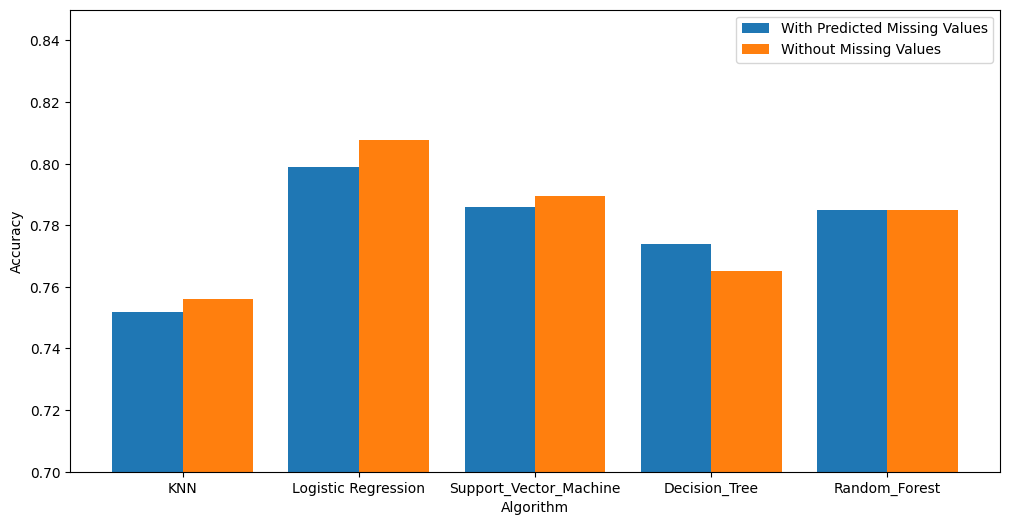

In [ ]:
X = df_Performance_Actual['Algorithm']
Initial_Accuracy = df_Performance_Actual['Accuracy with prediction']
Final_Accuracy = df_Performance_Actual['Accuracy without prediction']

X_axis = np.arange(len(X))

plt.figure(figsize=(12, 6))

plt.bar(X_axis - 0.2, Initial_Accuracy, 0.4, label = 'With Predicted Missing Values')
plt.bar(X_axis + 0.2, Final_Accuracy, 0.4, label = 'Without Missing Values')


plt.xticks(X_axis, X)
plt.ylim(0.7, 0.85)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
#plt.title("Accuracy")
plt.legend()
plt.show()

### HyperParameters Tuning

In [ ]:
# KNN

from sklearn.model_selection import cross_validate

n_values = []
p_values = []
Avg_Accuracy = []
for p in range(1,4):
    for n in range(3,8):
        knn = KNeighborsClassifier(p=p, n_neighbors=n)
        scores = cross_validate(knn, X_train_transformed, y_train, cv=10, scoring='accuracy')
        Avg_Accuracy.append(np.mean(scores['test_score']))
        p_values.append(p)
        n_values.append(n)
df_knn = pd.DataFrame(list(zip(n_values, p_values , Avg_Accuracy)),
               columns =['n_values', 'p_values' , 'Avg_Accuracy'])
df_knn

,n_values,p_values,Avg_Accuracy
0,3,1,0.763540
1,4,1,0.776411
2,5,1,0.767509
3,6,1,0.776406
4,7,1,0.769588
5,3,2,0.758240
6,4,2,0.770732
7,5,2,0.765433
8,6,2,0.773004
9,7,2,0.769408


<Axes: xlabel='p_values', ylabel='Avg_Accuracy'>

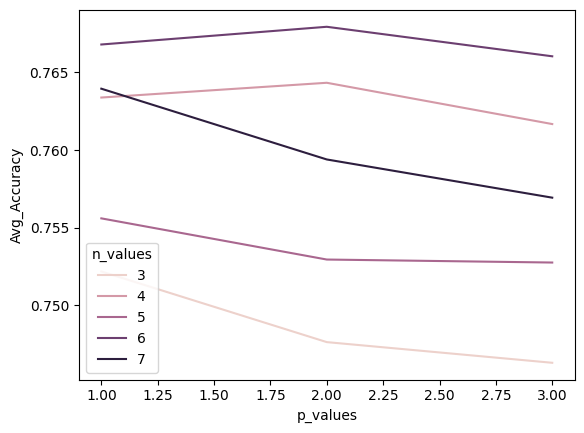

In [ ]:
# n,p vs Avg_Accuracy

sns.lineplot(data=df_knn, x="p_values", y="Avg_Accuracy", hue="n_values")


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2)

classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A1_new = accuracy_score(y_test, y_test_pred)

A1_new

0.757679180887372

In [ ]:
## Logistic Regression

c_values = []
penalty_types = []
Avg_Accuracy = []
for c1 in range(1,7):
    for penalty_type in ['l1', 'l2', None]:
        logr = linear_model.LogisticRegression(penalty=penalty_type,C=(c1/2),solver='saga')
        scores = cross_validate(logr, X_train_transformed, y_train, cv=10, scoring='accuracy')
        Avg_Accuracy.append(np.mean(scores['test_score']))
        c_values.append(c1/2)
        penalty_types.append(penalty_type)
df_lr = pd.DataFrame(list(zip(c_values, penalty_types , Avg_Accuracy)),
               columns =['c_values', 'penalty_type' , 'Avg_Accuracy'])
df_lr

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

,c_values,penalty_type,Avg_Accuracy
0,0.5,l1,0.801480
1,0.5,l2,0.802239
2,0.5,None,0.801860
3,1.0,l1,0.802048
4,1.0,l2,0.802049
5,1.0,None,0.801860
6,1.5,l1,0.802048
7,1.5,l2,0.801291
8,1.5,None,0.801860
9,2.0,l1,0.801669


<Axes: xlabel='c_values', ylabel='Avg_Accuracy'>

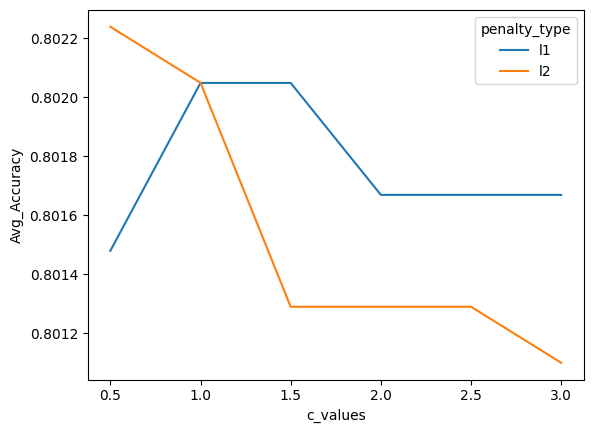

In [ ]:
# c_values, penalty_type vs Avg_Accuracy

sns.lineplot(data=df_lr, x="c_values", y="Avg_Accuracy", hue='penalty_type')

In [ ]:
from sklearn import linear_model

logr = linear_model.LogisticRegression(penalty='l2',C=0.5,solver='saga')

logr.fit(X_train_transformed, y_train)

y_test_pred = logr.predict(X_test_transformed)

A2_new = accuracy_score(y_test, y_test_pred)

A2_new

0.8088737201365188

In [ ]:
kernel_types = []
c_value = []
gamma_type = []
degree_value = []
Avg_Accuracy = []
for k in ['linear', 'poly', 'rbf', 'sigmoid']:
  for c_values in [0.2,0.5,1.0]:
    for d in [3,4,5]:
          svc = SVC(kernel=k,C=c_values,degree=d)
          scores = cross_validate(svc, X_train_transformed, y_train, cv=10, scoring='accuracy')
          Avg_Accuracy.append(np.mean(scores['test_score']))
          kernel_types.append(k)
          c_value.append(c_values)
          #gamma_type.append(g)
          degree_value.append(d)
df_svm = pd.DataFrame(list(zip(kernel_types, c_value, degree_value , Avg_Accuracy)),
               columns =['kernel', 'c_value', 'degree', 'Avg_Accuracy'])
df_svm

,kernel,c_value,degree,Avg_Accuracy
0,linear,0.2,3,0.795595
1,linear,0.2,4,0.795595
2,linear,0.2,5,0.795595
3,linear,0.5,3,0.796353
4,linear,0.5,4,0.796353
5,linear,0.5,5,0.796353
6,linear,1.0,3,0.795595
7,linear,1.0,4,0.795595
8,linear,1.0,5,0.795595
9,poly,0.2,3,0.789530


In [ ]:
df_svm.describe()

,c_value,degree,Avg_Accuracy
count,36.000000,36.000000,36.000000
mean,0.566667,4.000000,0.774534
std,0.334664,0.828079,0.031558
min,0.200000,3.000000,0.708577
25%,0.200000,3.000000,0.763606
50%,0.500000,4.000000,0.791428
75%,1.000000,5.000000,0.795595
max,1.000000,5.000000,0.796353


<Axes: xlabel='kernel', ylabel='Avg_Accuracy'>

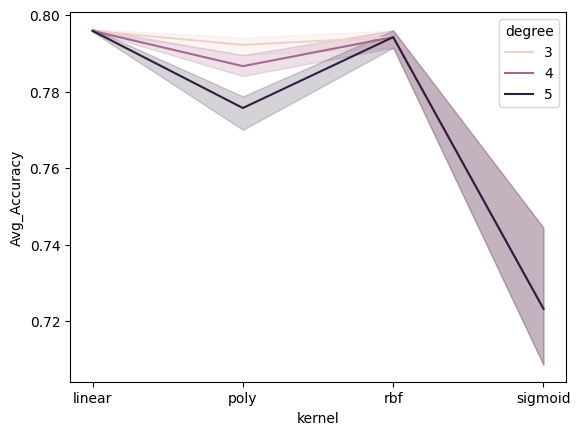

In [ ]:
# kernel, degree vs Avg_Accuracy

sns.lineplot(data=df_svm, x="kernel", y="Avg_Accuracy", hue='degree')

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',C=0.5,degree=3).fit(X_train_transformed, y_train)

y_test_pred = svc.predict(X_test_transformed)

A3_new = accuracy_score(y_test, y_test_pred)

A3_new

0.7901023890784983

In [ ]:
# Decision Tree

max_depth_values = []
criterion_types = []
Avg_Accuracy = []
for md in range(3,10):
    for criterion_type in ['gini', 'entropy', 'log_loss']:
        classifier = DecisionTreeClassifier(max_depth=md,criterion=criterion_type)
        scores = cross_validate(classifier, X_train_transformed, y_train, cv=10, scoring='accuracy')
        Avg_Accuracy.append(np.mean(scores['test_score']))
        max_depth_values.append(md)
        criterion_types.append(criterion_type)
df_dt = pd.DataFrame(list(zip(max_depth_values, criterion_types , Avg_Accuracy)),
               columns =['max_depth_values', 'criterion_type' , 'Avg_Accuracy'])
df_dt

,max_depth_values,criterion_type,Avg_Accuracy
0,3,gini,0.786113
1,3,entropy,0.786492
2,3,log_loss,0.786492
3,4,gini,0.782510
4,4,entropy,0.782321
5,4,log_loss,0.782321
6,5,gini,0.781566
7,5,entropy,0.783274
8,5,log_loss,0.783653
9,6,gini,0.786303


<Axes: xlabel='max_depth_values', ylabel='Avg_Accuracy'>

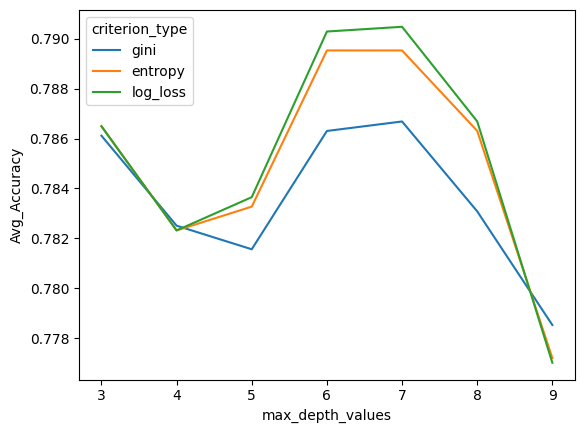

In [ ]:
# max depth, criterion vs Avg_Accuracy

sns.lineplot(data=df_dt, x="max_depth_values", y="Avg_Accuracy", hue='criterion_type')

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=7,criterion='log_loss')
classifier.fit(X_train_transformed,y_train)

y_test_pred = classifier.predict(X_test_transformed)

A4_new = accuracy_score(y_test, y_test_pred)

A4_new

0.782707622298066

In [ ]:
# RandomForestClassifier

n_value = []
criterion_type = []
Avg_Accuracy = []
for n in [100,200,300]:
  for c in ['gini','entropy','log_loss']:
          classifier = RandomForestClassifier(n_estimators=n,criterion=c)
          scores = cross_validate(classifier, X_train_transformed, y_train, cv=10, scoring='accuracy')
          Avg_Accuracy.append(np.mean(scores['test_score']))
          n_value.append(n)
          criterion_type.append(c)
df_rf = pd.DataFrame(list(zip(n_value, criterion_type, Avg_Accuracy)),
               columns =['no_of_trees', 'criterion', 'Avg_Accuracy'])
df_rf

,no_of_trees,criterion,Avg_Accuracy
0,100,gini,0.788580
1,100,entropy,0.791235
2,100,log_loss,0.791804
3,200,gini,0.792751
4,200,entropy,0.790287
5,200,log_loss,0.792944
6,300,gini,0.793132
7,300,entropy,0.792940
8,300,log_loss,0.792754


<Axes: xlabel='no_of_trees', ylabel='Avg_Accuracy'>

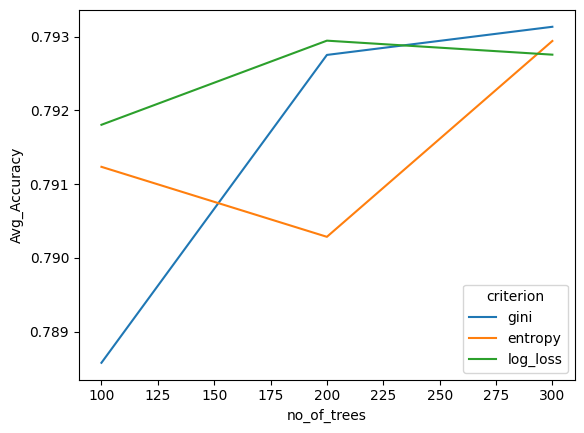

In [ ]:
# no_of_trees, criterion vs Avg_Accuracy

sns.lineplot(data=df_rf, x="no_of_trees", y="Avg_Accuracy", hue='criterion')

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=300,criterion='gini')
classifier.fit(X_train_transformed, y_train)

y_test_pred = classifier.predict(X_test_transformed)

A5_new = accuracy_score(y_test, y_test_pred)

A5_new

0.7935153583617748

In [ ]:
New_Performance_data = [['KNN', A1, A1_new, (A1_new-A1)*100], ['Logistic Regression', A2, A2_new, (A2_new-A2)*100], ['Support_Vector_Machine', A3, A3_new, (A3_new-A3)*100],['Decision_Tree', A4, A4_new, (A4_new-A4)*100],['Random_Forest', A5, A5_new, (A5_new-A5)*100]]

New_df_Performance = pd.DataFrame(New_Performance_data, columns=['Algorithm', 'Initial_Accuracy', 'Final_Accuracy', 'Accuracy %'])

New_df_Performance

,Algorithm,Initial_Accuracy,Final_Accuracy,Accuracy %
0,KNN,0.755973,0.757679,0.170648
1,Logistic Regression,0.807736,0.808874,0.113766
2,Support_Vector_Machine,0.789534,0.790102,0.056883
3,Decision_Tree,0.765074,0.782708,1.763367
4,Random_Forest,0.784983,0.793515,0.853242


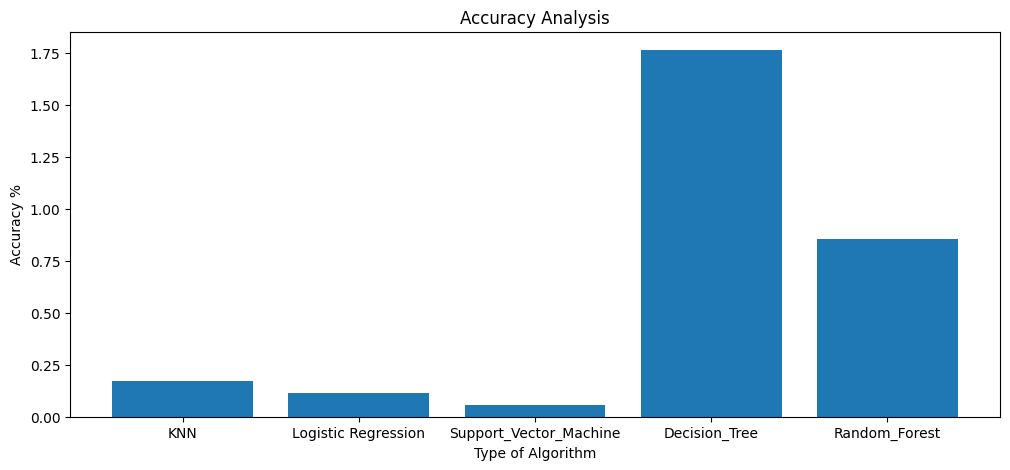

In [ ]:
x1 = New_df_Performance['Algorithm']
y1 = New_df_Performance['Accuracy %']
plt.figure(figsize=(12,5))
plt.title("Accuracy Analysis")
plt.bar(x1,y1)
plt.xlabel('Type of Algorithm')
plt.ylabel('Accuracy %')
plt.show()

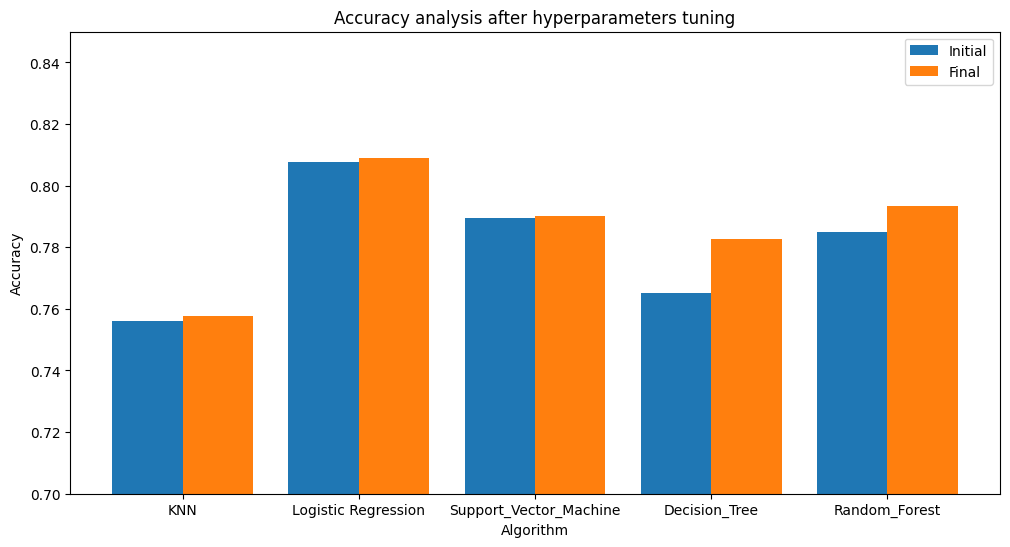

In [ ]:
X = New_df_Performance['Algorithm']
Initial = New_df_Performance['Initial_Accuracy']
Final = New_df_Performance['Final_Accuracy']

X_axis = np.arange(len(X))

plt.figure(figsize=(12, 6))

plt.bar(X_axis - 0.2, Initial, 0.4, label = 'Initial')
plt.bar(X_axis + 0.2, Final, 0.4, label = 'Final')


plt.xticks(X_axis, X)
plt.ylim(0.7, 0.85)
plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy analysis after hyperparameters tuning")
plt.legend()
plt.show()